In [23]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

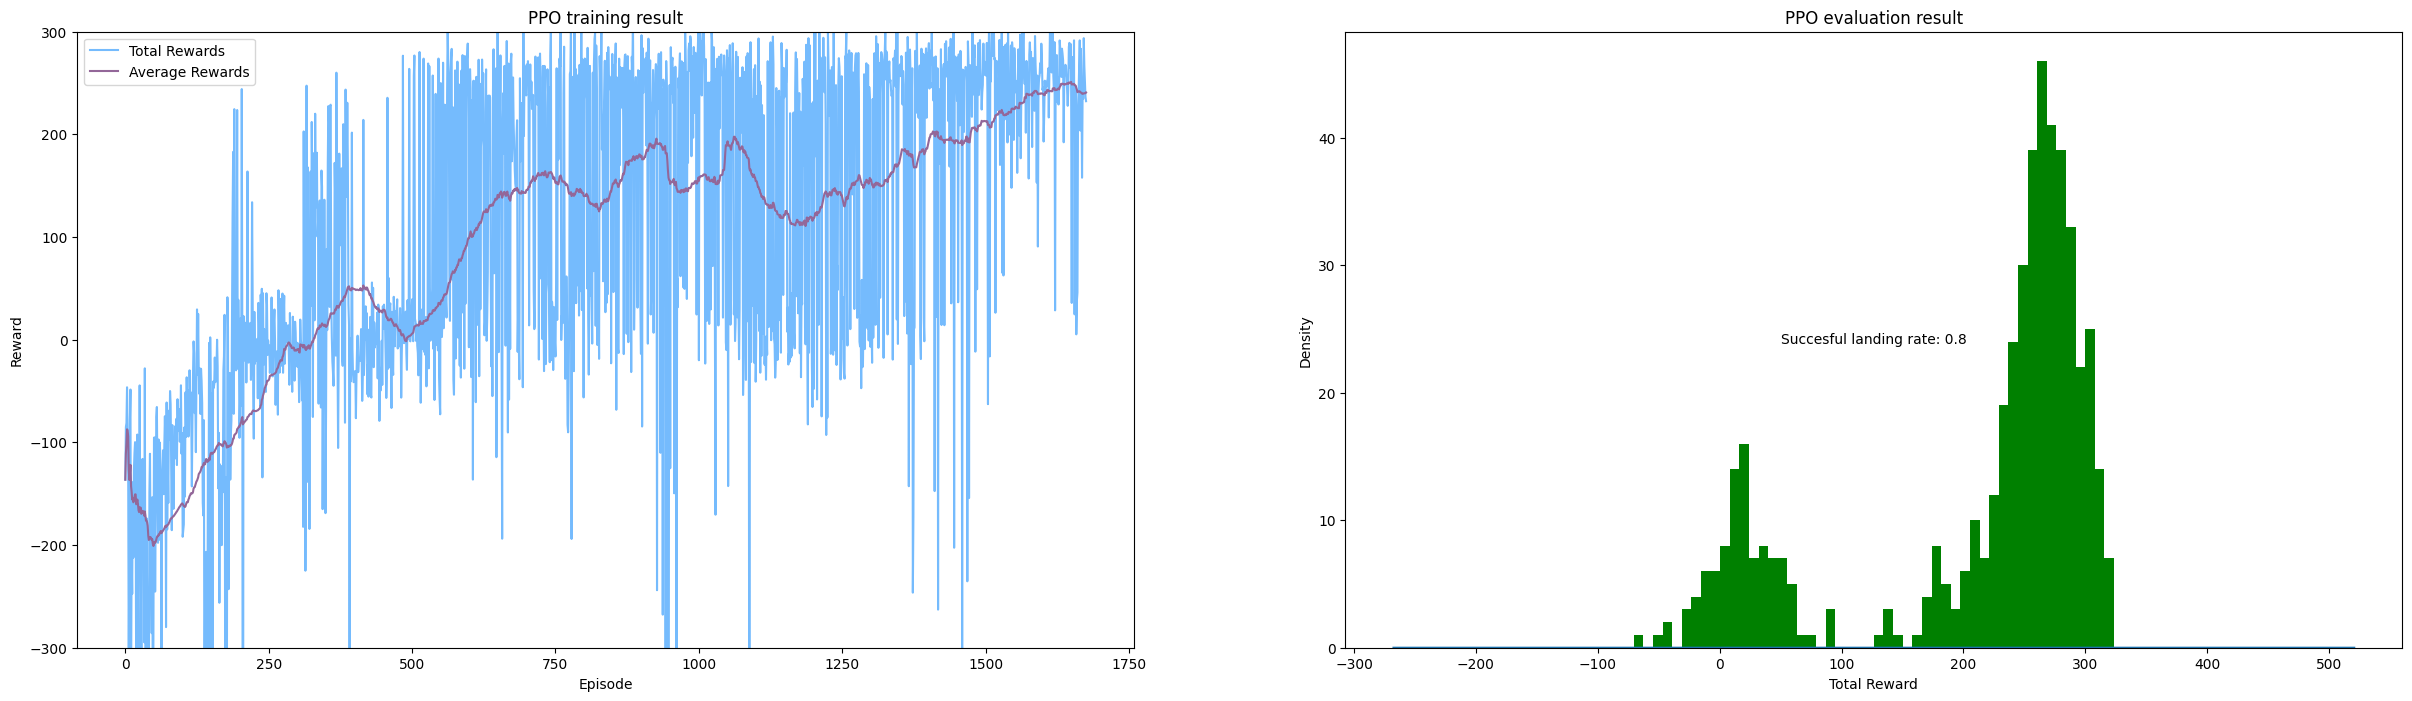

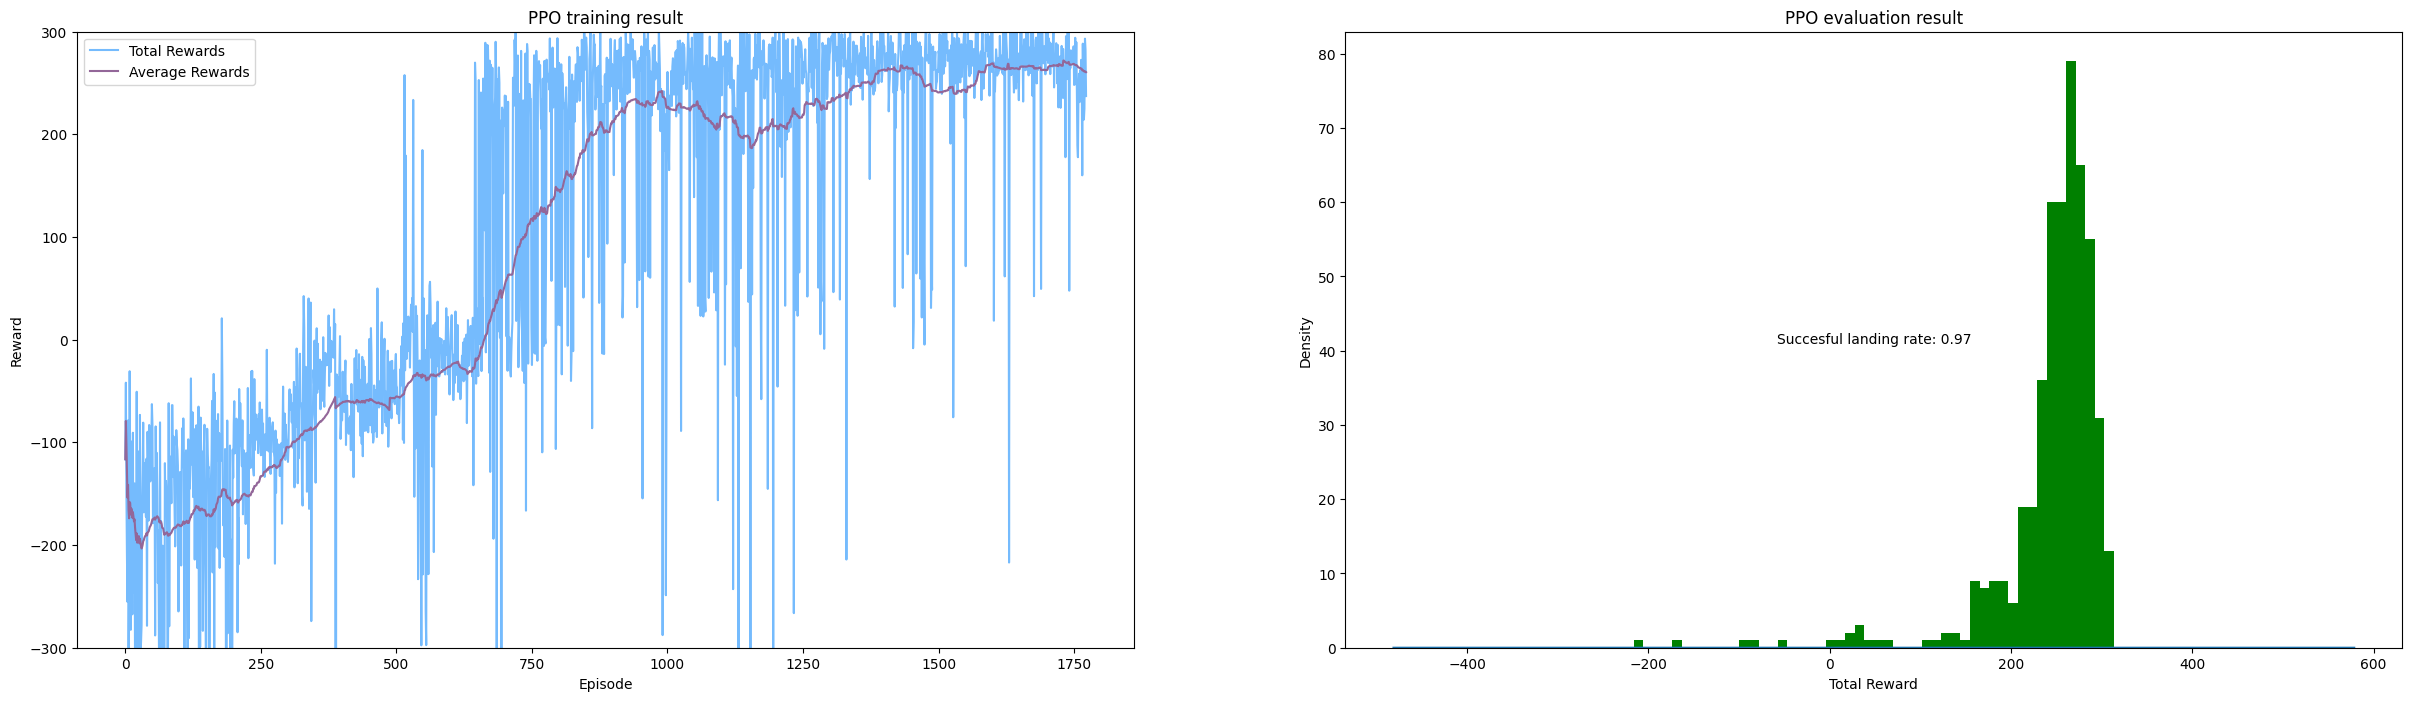

In [24]:

for N in range(1,3):
    with open(f'PPO_Result_{N}.pkl', 'rb') as f:
        data = pickle.load(f)

    total_rewards = data['total_rewards']
    final_rewards = data['final_rewards']
    moving_average_rewards = data['moving_average_rewards']
    test_total_rewards = data['test_total_rewards']
    test_final_rewards = data['test_final_rewards']
    step_used_list = data['step_used_list']
    purple_color=(147/255,103/255,153/255)
    
    plt.figure(figsize=(30,8))

    plt.subplot(1, 2, 1)
    plt.title("PPO training result")
    plt.plot(total_rewards, label='Total Rewards',color='xkcd:sky blue')
    # plt.scatter(list(range(len(final_rewards))),final_rewards, color='xkcd:dark blue', label='Final Rewards', s=1, zorder=10)
    plt.plot(moving_average_rewards, color=purple_color, label='Average Rewards')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.ylim(-300, 300)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title("PPO evaluation result")
    plt.hist(test_total_rewards, bins=50, color='green')
    plt.xlabel('Total Reward')
    plt.ylabel('Frequency')
    success_rate = test_final_rewards.count(100)/ 500
    plt.text(0.5, 0.5, f'Succesful landing rate: {success_rate}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    


    plt.show()

<Axes: ylabel='Density'>

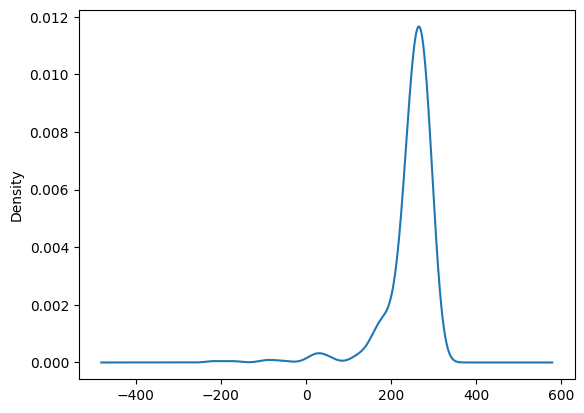

In [25]:
    final_results = pd.Series(test_total_rewards, name="final results")
    final_results.plot(kind="kde", label="final results")